<a href="https://colab.research.google.com/github/suvendu77/AnamolyWorkShop/blob/main/Copy_of_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

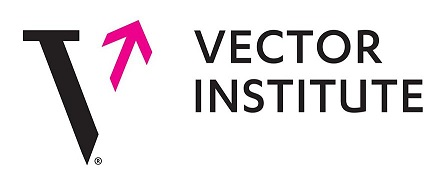

### **Welcome to the Anomaly Detection Workshop!**

Instructor: Mehdi Ataei
| Tutorial Developer: Omar Imran
| Teacher Assistants: Sareh Soltani and Omar Imran
| Technical Education Specialist: Flora Wan

### ***Never stop learning!***



For the best experience, change the runtime to use a GPU accelerator. You can use a free GPU on Colab by selecting:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

# Part 1: Anomaly Detection for Tabular Data

## Case Study: Credit Card Fraud Detection

Fraud detection is a popular application of anomaly detection. Since the instances of fraud cases is so minimal compared to non-fraud, there is a need to use outlier detection. In this tutorial, we will go over a popular dataset known as the "Credit Card Fraud Detection" dataset.

Here are some features of the dataset:


*   Contains 284k transactions in Europe of various of amounts using their credit card
*   Each transaction categorized with 2 classes: Fraud and non fraud

* Features include amount per trasaction. Most features have been anonymized due to confidentiality issues. Anonymization was done using Prinicpal Component Analysis.  

* Huge imbalance with dataset, only 0.172% of cases are considered fraudulent.

* Need to deal with imbalance using correct metrics (i.e., no accuracy)



In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change PATH to working directory on Google Drive
PATH = "/content/drive/MyDrive/Job/Vector/Anomaly Detection August 2023/Tutorial 2/"
# PATH = ""

In [ ]:
# Read in dataset
cc_df = pd.read_csv(PATH + "creditcard.csv")

In [ ]:
# Take a look
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check to see any null values
cc_df.isnull().sum().max()

0

In [ ]:
#shuffling our dataset
cc_df = cc_df.sample(frac=1,random_state=42)

In [ ]:
# Downsample
positive = cc_df[cc_df["Class"]== 1]
negative = cc_df[cc_df["Class"]== 0]

cc_df = pd.concat([positive,negative[:10000]])


Text(0.5, 1.0, 'Pie chart of Fraud and Non Fraud')

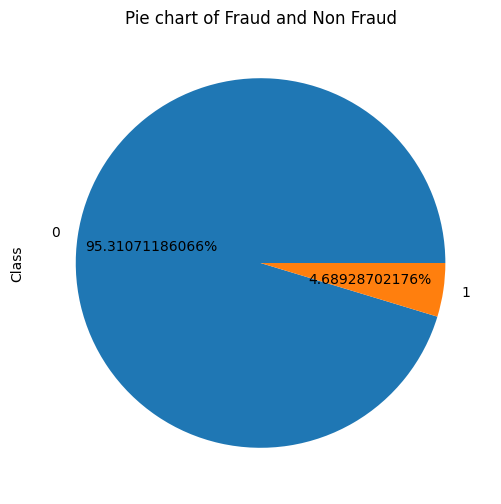

In [ ]:
# Create a pie chart
m = cc_df['Class'].value_counts()
m.plot(kind ='pie', autopct = '%1.11f%%', figsize = (12,6))
plt.title('Pie chart of Fraud and Non Fraud')

In [ ]:
1# Describe features
# (Take a look at the range of Time and Amount)
cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,...,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000
mean,93825.674609,-0.248065,0.163199,-0.323417,0.208534,-0.139020,-0.087519,-0.248781,0.035320,-0.117522,...,0.031979,0.004275,0.002683,-0.004319,0.015481,0.004856,0.013363,-0.001296,88.330426,0.046893
std,47353.385051,2.656269,2.127812,2.576697,1.778622,1.932421,1.404578,2.267809,1.815642,1.314033,...,1.059517,0.772107,0.703898,0.605458,0.536072,0.478739,0.489240,0.337553,233.740105,0.211419
min,0.000000,-33.669917,-48.060856,-31.103685,-5.560118,-23.611865,-20.869626,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-22.575000,-2.824849,-4.781606,-1.476146,-8.260909,-6.328503,0.000000,0.000000
25%,53446.750000,-1.002719,-0.567886,-1.065396,-0.799015,-0.744983,-0.813324,-0.629472,-0.210698,-0.713745,...,-0.226156,-0.540509,-0.171307,-0.361846,-0.305925,-0.319008,-0.070876,-0.052916,5.000000,0.000000
50%,83840.000000,-0.089110,0.110964,0.120053,0.044595,-0.071501,-0.311324,0.006673,0.025637,-0.088960,...,-0.019917,0.015610,-0.017662,0.041733,0.037920,-0.045524,0.002992,0.011512,21.250000,0.000000
75%,138517.750000,1.285012,0.899053,0.992261,0.888415,0.616646,0.351353,0.556440,0.352019,0.560685,...,0.203249,0.530817,0.147021,0.434419,0.360404,0.253447,0.106004,0.084959,78.857500,0.000000
max,172782.000000,2.370633,22.057729,3.818495,12.699542,29.016124,16.493227,21.437514,20.007208,10.370658,...,27.202839,8.361985,22.083545,3.378881,6.070850,2.952093,9.200883,15.619041,5239.500000,1.000000


**Question:** What sort of data preprocessing steps would you do looking at this?

In [ ]:
# Scale amount and drop time
from sklearn.preprocessing import StandardScaler
cc_df['Amount'] = StandardScaler().fit_transform(cc_df[['Amount']])
cc_df = cc_df.drop(["Time"], axis = 1)

In [ ]:
# Get X and y
X, y = cc_df.drop(["Class"],axis=1), cc_df["Class"]

In [ ]:
# Install pyod
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=8caf459f1dad6b1c66a176b5fd6447bcdf45933427f99d05046e630b0fc3988b
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


**One class Support Vector Machines (OCSVM)**



* Unsupervised algorithm   
* Built upon traditional SVMs
*   Focus on finding the boundary or hypersphere (not hyperplane) for the "normal" class and the rest (outliers)
* Seeks to find smallest possible hypersphere (not like SVMs)

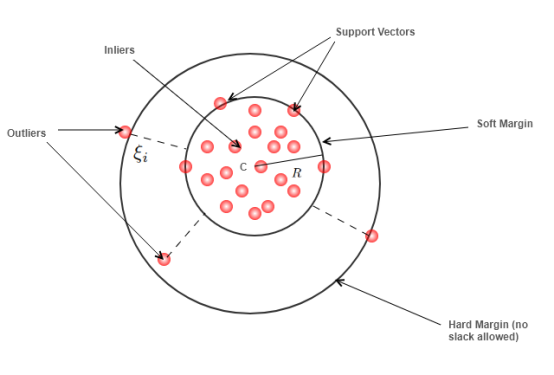

In [ ]:
from pyod.models.ocsvm  import OCSVM

In [ ]:
# train OCSVM detector
clf_name = 'OCSVM'
clf = OCSVM(contamination= 0.04)
clf.fit(X,)
# get the prediction label and outlier scores of the data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

In [ ]:
from pyod.utils.data import evaluate_print

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y, y_train_scores)


On Training Data:
OCSVM ROC:0.9475, precision @ rank n:0.6524


**Question:** Why are precision and ROC both used to measure the performance of the model? Why not just use one or the other?

In [ ]:
from pyod.models.knn  import KNN

In [ ]:
# train kNN detector
clf_name = 'KNN'
clf = KNN(contamination=0.04, n_neighbors = 5)
clf.fit(X,)
# get the prediction label and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

In [ ]:
from pyod.utils.data import evaluate_print

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y, y_train_scores)


On Training Data:
KNN ROC:0.9138, precision @ rank n:0.4431


**Autoencoders**



*   Trained to learn a representation of the data and then work to reconstruct it
*   For anomaly detection, autoencoders may struggle to reconstruct the abnormal data points which is how they will be identified.   

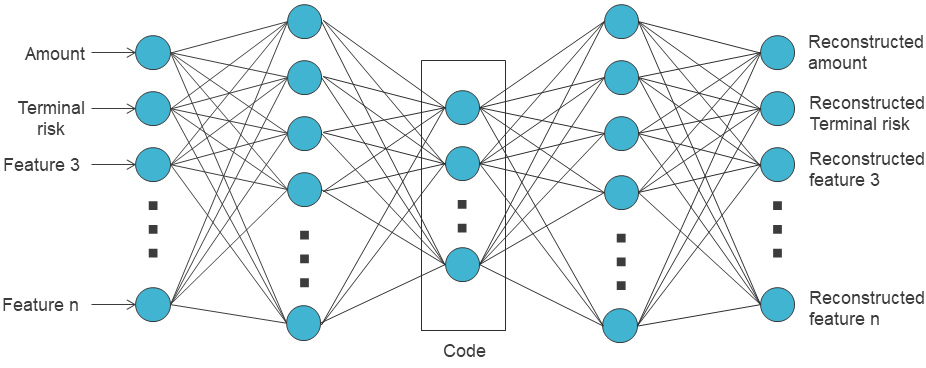

In [ ]:
from pyod.models.auto_encoder  import AutoEncoder

In [ ]:
# train kNN detector
clf_name = 'AutoEncoder'
contamination = 0.04  # percentage of outliers
clf = AutoEncoder(hidden_neurons =[15, 10, 6, 2, 2, 6, 10, 15], contamination=contamination, epochs = 10)
clf.fit(X,)
# get the prediction label and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 29)                870       
                                                                 
 dropout (Dropout)           (None, 29)                0         
                                                                 
 dense_1 (Dense)             (None, 29)                870       
                                                                 
 dropout_1 (Dropout)         (None, 29)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                450       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [ ]:
from pyod.utils.data import evaluate_print

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y, y_train_scores)


On Training Data:
AutoEncoder ROC:0.9364, precision @ rank n:0.6118


# Part 2:  Anomaly Detection for Time Series Data

## Case Study: Traffic Prediction

Predicting traffic is another use case of anomaly detection (i.e., consumer traffic, network traffic) . Usually traffic is normal but there are instances where traffic can spike or drop unexpectedly. In this case study, we will look at a dataset that studies traffic for taxis in New York City (NYC). The time period spans from June 30th 2014 to Jan 31st 2015 (i.e., 6 months). During this time there were 5 events where the amount of traffic changed significantly(NYC marathon, Christmas, New Years Day, Snowstorm, and Thanksgiving).

**Question:** What other events may cause anomalies that are not listed?

In [ ]:
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change PATH to working directory on Google Drive
PATH = "/content/drive/MyDrive/Job/Vector/Anomaly Detection August 2023/Tutorial 2/"
# PATH = ""

In [ ]:
# Read in dataset
taxi_df = pd.read_csv(PATH + "taxi.csv", index_col=0)

In [ ]:
taxi_df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
# Check for any null values
taxi_df.isnull().sum().max()

0

In [ ]:
# Convert to timestamp
taxi_df['timestamp'] = pd.to_datetime(taxi_df['timestamp'])
taxi_df = taxi_df.set_index('timestamp')

In [ ]:
# Change to hourly only (take out eveyr 30 mins)
taxi_df = taxi_df.resample('H').sum()
taxi_df

,value
timestamp,
2014-07-01 00:00:00,18971
2014-07-01 01:00:00,10866
2014-07-01 02:00:00,6693
2014-07-01 03:00:00,4433
2014-07-01 04:00:00,4379
...,...
2015-01-31 19:00:00,56577
2015-01-31 20:00:00,48276
2015-01-31 21:00:00,48389


In [ ]:
taxi_df['day'] = [i.day for i in taxi_df.index]
taxi_df['day_name'] = [i.day_name() for i in taxi_df.index]
taxi_df['day_of_year'] = [i.dayofyear for i in taxi_df.index]
taxi_df['week_of_year'] = [i.weekofyear for i in taxi_df.index]
taxi_df['hour'] = [i.hour for i in taxi_df.index]
taxi_df['is_weekday'] = [i.isoweekday() for i in taxi_df.index]

In [ ]:
taxi_df

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday
timestamp,,,,,,,
2014-07-01 00:00:00,18971,1,Tuesday,182,27,0,2
2014-07-01 01:00:00,10866,1,Tuesday,182,27,1,2
2014-07-01 02:00:00,6693,1,Tuesday,182,27,2,2
2014-07-01 03:00:00,4433,1,Tuesday,182,27,3,2
2014-07-01 04:00:00,4379,1,Tuesday,182,27,4,2
...,...,...,...,...,...,...,...
2015-01-31 19:00:00,56577,31,Saturday,31,5,19,6
2015-01-31 20:00:00,48276,31,Saturday,31,5,20,6
2015-01-31 21:00:00,48389,31,Saturday,31,5,21,6


There are 5 five events show to have abnormal activities with traffic:
* NYC Marathon: Nov 2nd
* Thanksgiving: Nov 27th
* Christmas: Dec 25th
* New Years: Dec 31st
* Snowstorm: Jan 26th

Text(0, 0.5, 'Taxi Rides')

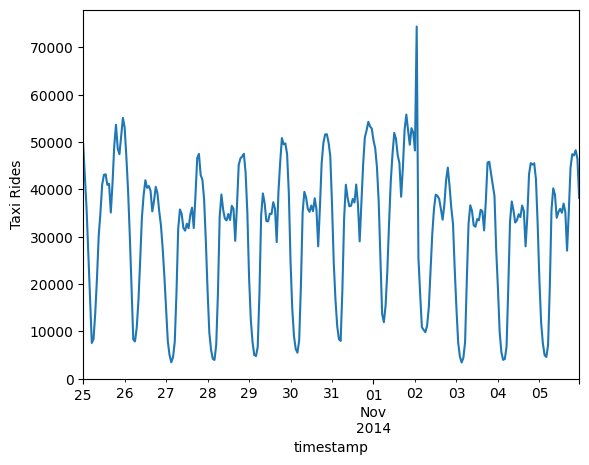

In [ ]:
# Marathon
taxi_df.loc[ "2014-10-25" :  "2014-11-05"].value.plot()
plt.ylabel("Taxi Rides")

Text(0, 0.5, 'Taxi Rides')

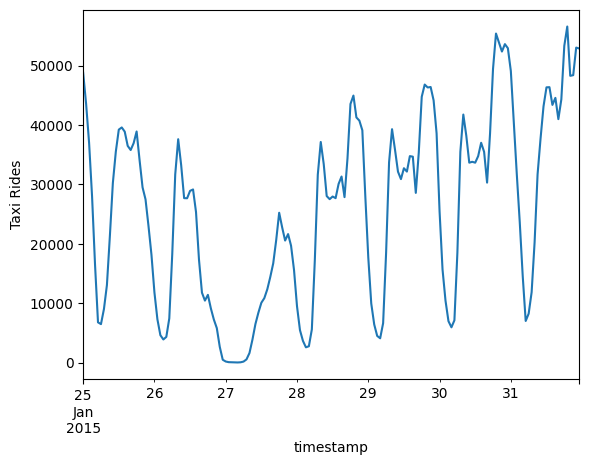

In [ ]:
# Snowstorm
taxi_df.loc[ "2015-01-25" :  "2015-02-05"].value.plot()
plt.ylabel("Taxi Rides")

Text(0, 0.5, 'Taxi Rides')

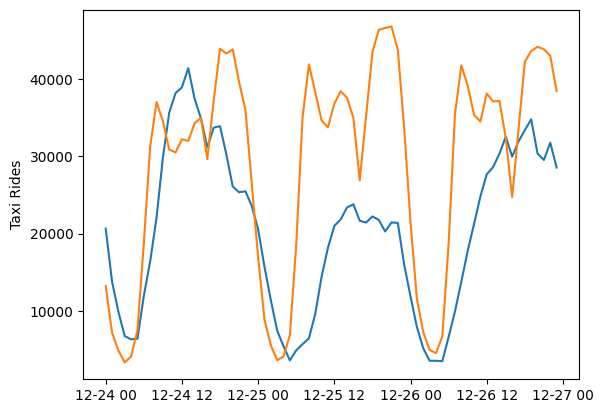

In [ ]:
fig1 = taxi_df.loc[ "2014-12-24" :  "2014-12-26"]
fig2 = taxi_df.loc[ "2014-12-01" :  "2014-12-03"]
plt.plot(fig1.index, fig1.value)
plt.plot(fig1.index, fig2.value)
plt.ylabel("Taxi Rides")

**Question:** Anyone see any trends just by looking at the graph?

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# plot value on y-axis and date on x-axis**
fig = px.line(taxi_df, x=taxi_df.index, y="value", title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')



# # obtain y value of anomalies to plot**
# y_values = [taxi_df.loc[i]['value'] for i in taxi_df]

# fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers',
#                 name = 'Anomaly',
#                 marker=dict(color='red',size=10)))

fig.show()

**Isolation Forests for Time Series**



*   Unsupervised algorithm
*   Tree based algorithm
* Assumes anomalies are seperable and would be found first compared to other "normal" points (i.e., shorter depth trees)
* Cannot capture some dependecies that are captured with a RNN  



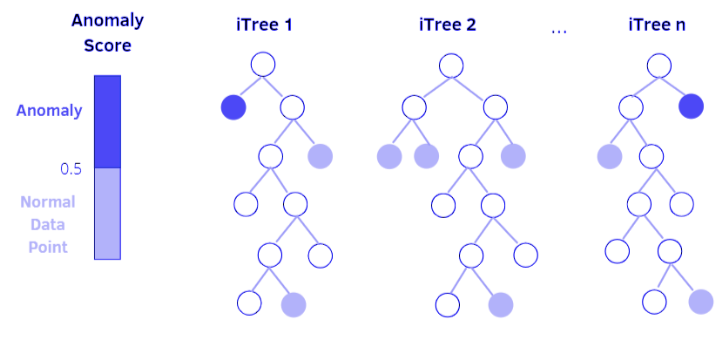

In [ ]:
from pycaret.anomaly import *

In [ ]:
# Create session
s = setup(taxi_df, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(5160, 7)"
2,Transformed data shape,"(5160, 13)"
3,Numeric features,6
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [ ]:
# train model
iforest = create_model('iforest', fraction = 0.02)
iforest_results = assign_model(iforest)
iforest_results

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2014-07-01 00:00:00,18971,1,Tuesday,182,27,0,2,0,-0.038309
2014-07-01 01:00:00,10866,1,Tuesday,182,27,1,2,0,-0.032644
2014-07-01 02:00:00,6693,1,Tuesday,182,27,2,2,0,-0.038784
2014-07-01 03:00:00,4433,1,Tuesday,182,27,3,2,0,-0.033416
2014-07-01 04:00:00,4379,1,Tuesday,182,27,4,2,0,-0.031312
...,...,...,...,...,...,...,...,...,...
2015-01-31 19:00:00,56577,31,Saturday,31,5,19,6,1,0.010211
2015-01-31 20:00:00,48276,31,Saturday,31,5,20,6,1,0.000615
2015-01-31 21:00:00,48389,31,Saturday,31,5,21,6,1,0.000615


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# plot value on y-axis and date on x-axis**
fig = px.line(iforest_results, x=iforest_results.index, y="value", title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')

# create list of outlier_dates**
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index

# obtain y value of anomalies to plot**
y_values = [iforest_results.loc[i]['value'] for i in outlier_dates]

fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers',
                name = 'Anomaly',
                marker=dict(color='red',size=10)))

fig.show()

**Local Outlier Factor**



*   Unsupervised algorithm that focuses on finding isolated points
*   Similar steps to KNN
*   Computes the local density (i.e., how isolated the point is to its neighbours) and the density of its neighbours (i.e., how isolated its neighbours are)


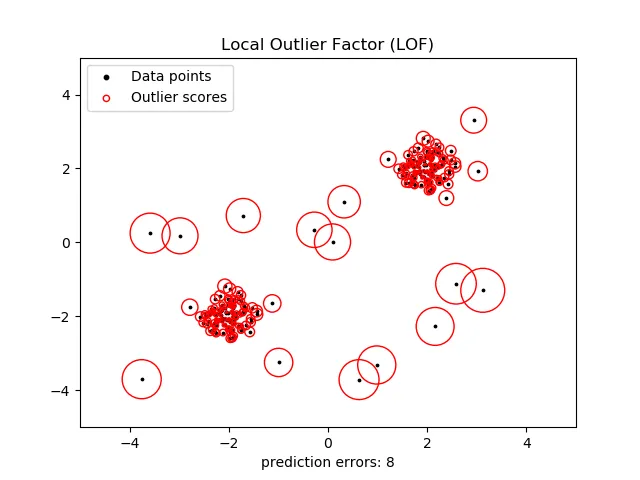

In [ ]:
# train model
lof = create_model('lof', fraction = 0.02)
lof_results = assign_model(lof)
lof_results

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2014-07-01 00:00:00,18971,1,Tuesday,182,27,0,2,0,1.070078
2014-07-01 01:00:00,10866,1,Tuesday,182,27,1,2,0,0.984749
2014-07-01 02:00:00,6693,1,Tuesday,182,27,2,2,0,1.011035
2014-07-01 03:00:00,4433,1,Tuesday,182,27,3,2,0,1.033525
2014-07-01 04:00:00,4379,1,Tuesday,182,27,4,2,0,1.039746
...,...,...,...,...,...,...,...,...,...
2015-01-31 19:00:00,56577,31,Saturday,31,5,19,6,1,1.772234
2015-01-31 20:00:00,48276,31,Saturday,31,5,20,6,1,1.700139
2015-01-31 21:00:00,48389,31,Saturday,31,5,21,6,0,1.487921


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# plot value on y-axis and date on x-axis**
fig = px.line(lof_results, x=lof_results.index, y="value", title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')

# create list of outlier_dates**
outlier_dates = lof_results[lof_results['Anomaly'] == 1].index

# obtain y value of anomalies to plot**
y_values = [lof_results.loc[i]['value'] for i in outlier_dates]

fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers',
                name = 'Anomaly',
                marker=dict(color='red',size=10)))

fig.show()

**Minimum Covariance Determinant**



*   Unsupervised algorithm
*   Statistical multivariate method that aims to find a center(mean) and spread(covariance) of the data. Points outside the spread will be labeled as outliers.
* Finds subset of points that contribute most to the estimation
* Mahalanobis distance used for distance calculations

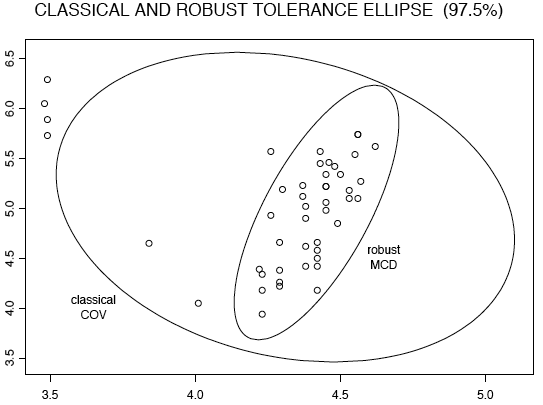

In [ ]:
# train model
mcd = create_model('mcd', fraction = 0.02)
mcd_results = assign_model(mcd)
mcd_results

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2014-07-01 00:00:00,18971,1,Tuesday,182,27,0,2,0,14.283954
2014-07-01 01:00:00,10866,1,Tuesday,182,27,1,2,0,13.198576
2014-07-01 02:00:00,6693,1,Tuesday,182,27,2,2,0,13.662125
2014-07-01 03:00:00,4433,1,Tuesday,182,27,3,2,0,14.386430
2014-07-01 04:00:00,4379,1,Tuesday,182,27,4,2,0,14.627846
...,...,...,...,...,...,...,...,...,...
2015-01-31 19:00:00,56577,31,Saturday,31,5,19,6,0,38.675196
2015-01-31 20:00:00,48276,31,Saturday,31,5,20,6,0,35.771476
2015-01-31 21:00:00,48389,31,Saturday,31,5,21,6,0,35.884390


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# plot value on y-axis and date on x-axis**
fig = px.line(mcd_results, x=mcd_results.index, y="value", title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')

# create list of outlier_dates**
outlier_dates = mcd_results[mcd_results['Anomaly'] == 1].index

# obtain y value of anomalies to plot**
y_values = [mcd_results.loc[i]['value'] for i in outlier_dates]

fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers',
                name = 'Anomaly',
                marker=dict(color='red',size=10)))

fig.show()